# VLM Benchmark Results Visualization

This notebook visualizes the benchmark results from VLM testing on visual geometry tasks.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## Load Results

In [2]:
# Load baseline results (modify path as needed)
RESULTS_FILE = "benchmark_results_openai-gpt5_42.json"

with open(RESULTS_FILE, 'r') as f:
    data = json.load(f)

metrics = data['metrics']
results = data['results']

print(f"Loaded {len(results)} results")
print(f"Overall Accuracy: {metrics['overall']['accuracy']:.2%}")

Loaded 750 results
Overall Accuracy: 64.67%


## Overall Accuracy Summary

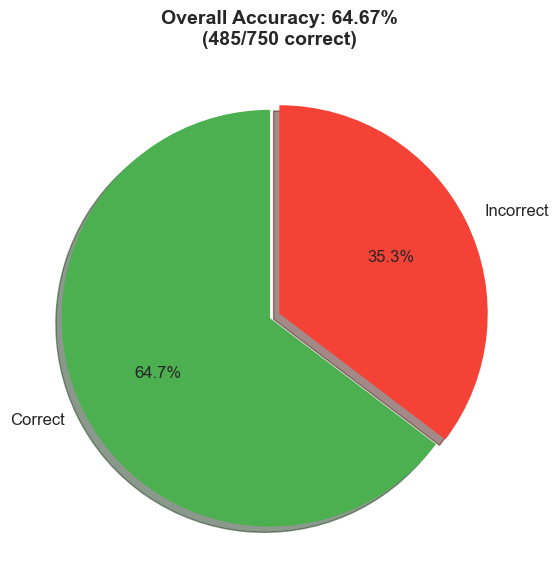

In [3]:
overall = metrics['overall']

fig, ax = plt.subplots(figsize=(8, 6))

# Pie chart for correct vs incorrect
sizes = [overall['correct'], overall['total'] - overall['correct']]
labels = ['Correct', 'Incorrect']
colors = ['#4CAF50', '#F44336']
explode = (0.05, 0)

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.set_title(f'Overall Accuracy: {overall["accuracy"]:.2%}\n({overall["correct"]}/{overall["total"]} correct)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('overall_accuracy.png', dpi=150, bbox_inches='tight')
plt.show()

## Accuracy by Task Type

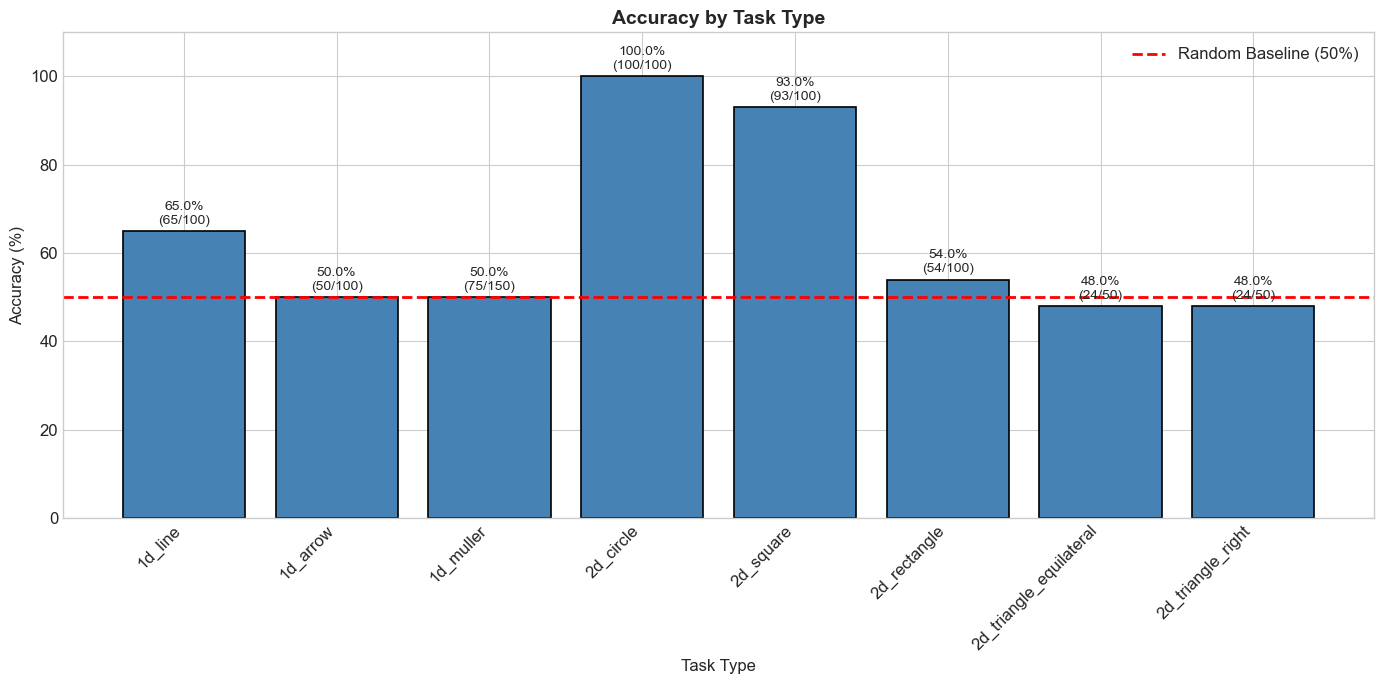

In [4]:
# Extract task type metrics
task_types = metrics['by_task_type']

# Order tasks logically
task_order = [
    '1d_line', '1d_arrow', '1d_muller',
    '2d_circle', '2d_square', '2d_rectangle',
    '2d_triangle_equilateral', '2d_triangle_right'
]

# Filter to only existing tasks
task_order = [t for t in task_order if t in task_types]

accuracies = [task_types[t]['accuracy'] * 100 for t in task_order]
totals = [task_types[t]['total'] for t in task_order]
corrects = [task_types[t]['correct'] for t in task_order]

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(task_order))
bars = ax.bar(x, accuracies, color='steelblue', edgecolor='black', linewidth=1.2)

# Add value labels on bars
for i, (bar, acc, correct, total) in enumerate(zip(bars, accuracies, corrects, totals)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{acc:.1f}%\n({correct}/{total})', ha='center', va='bottom', fontsize=10)

# Add 50% baseline (random guess)
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Random Baseline (50%)')

ax.set_xlabel('Task Type', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Accuracy by Task Type', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(task_order, rotation=45, ha='right')
ax.set_ylim(0, 110)
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('accuracy_by_task_type.png', dpi=150, bbox_inches='tight')
plt.show()

## Accuracy by Subtask

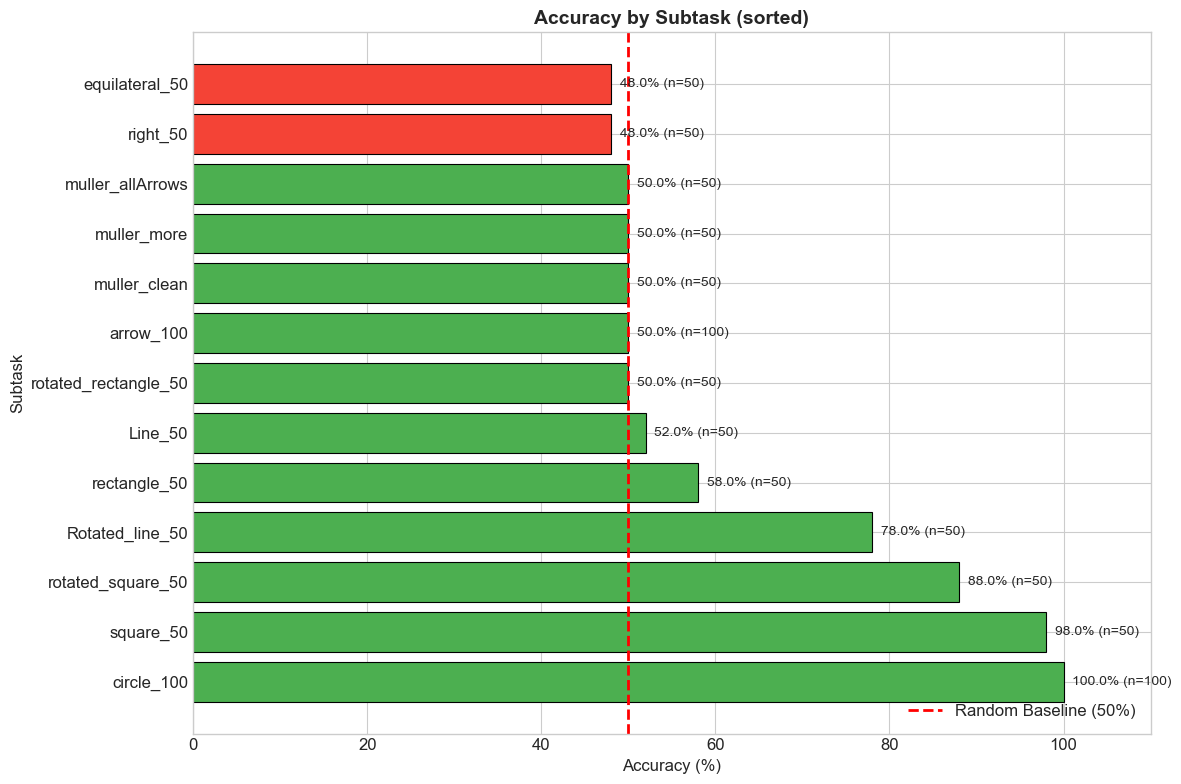

In [5]:
# Extract subtask metrics
subtasks = metrics['by_subtask']

# Sort by accuracy
sorted_subtasks = sorted(subtasks.items(), key=lambda x: x[1]['accuracy'], reverse=True)

subtask_names = [s[0] for s in sorted_subtasks]
subtask_accs = [s[1]['accuracy'] * 100 for s in sorted_subtasks]
subtask_totals = [s[1]['total'] for s in sorted_subtasks]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, max(8, len(subtask_names) * 0.5)))

y = np.arange(len(subtask_names))
colors = ['#4CAF50' if acc >= 50 else '#F44336' for acc in subtask_accs]

bars = ax.barh(y, subtask_accs, color=colors, edgecolor='black', linewidth=0.8)

# Add value labels
for i, (bar, acc, total) in enumerate(zip(bars, subtask_accs, subtask_totals)):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{acc:.1f}% (n={total})', ha='left', va='center', fontsize=10)

# Add 50% baseline
ax.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Random Baseline (50%)')

ax.set_xlabel('Accuracy (%)', fontsize=12)
ax.set_ylabel('Subtask', fontsize=12)
ax.set_title('Accuracy by Subtask (sorted)', fontsize=14, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(subtask_names)
ax.set_xlim(0, 110)
ax.legend(loc='lower right')

plt.tight_layout()
plt.savefig('accuracy_by_subtask.png', dpi=150, bbox_inches='tight')
plt.show()

## Accuracy by Category

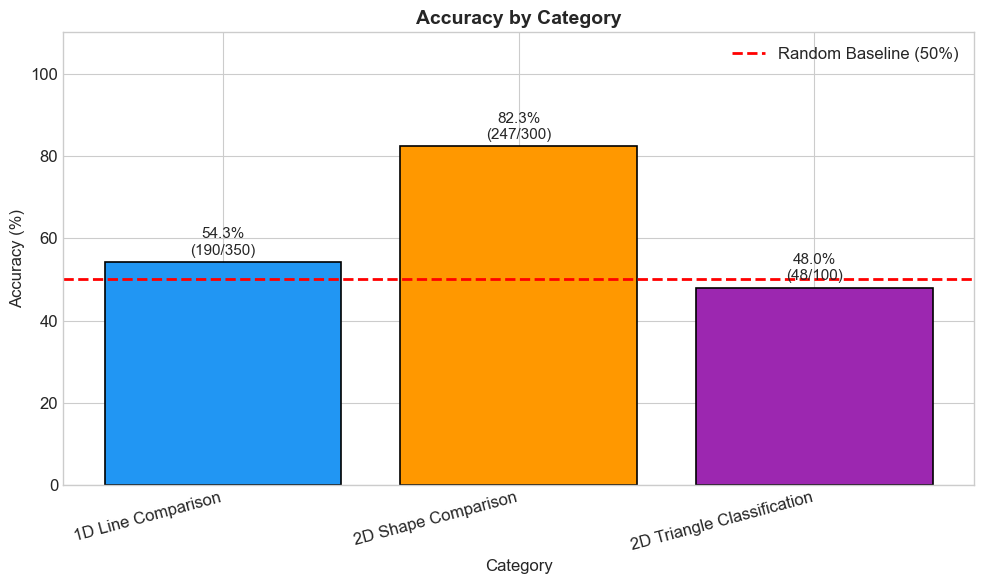

In [6]:
# Group by category
categories = {
    '1D Line Comparison': ['1d_line', '1d_arrow', '1d_muller'],
    '2D Shape Comparison': ['2d_circle', '2d_square', '2d_rectangle'],
    '2D Triangle Classification': ['2d_triangle_equilateral', '2d_triangle_right']
}

cat_metrics = {}
for cat_name, task_list in categories.items():
    correct = sum(task_types.get(t, {}).get('correct', 0) for t in task_list)
    total = sum(task_types.get(t, {}).get('total', 0) for t in task_list)
    if total > 0:
        cat_metrics[cat_name] = {'correct': correct, 'total': total, 'accuracy': correct / total}

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

cat_names = list(cat_metrics.keys())
cat_accs = [cat_metrics[c]['accuracy'] * 100 for c in cat_names]
cat_totals = [cat_metrics[c]['total'] for c in cat_names]
cat_corrects = [cat_metrics[c]['correct'] for c in cat_names]

x = np.arange(len(cat_names))
colors = ['#2196F3', '#FF9800', '#9C27B0']

bars = ax.bar(x, cat_accs, color=colors[:len(cat_names)], edgecolor='black', linewidth=1.2)

# Add value labels
for bar, acc, correct, total in zip(bars, cat_accs, cat_corrects, cat_totals):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{acc:.1f}%\n({correct}/{total})', ha='center', va='bottom', fontsize=11)

# Add 50% baseline
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Random Baseline (50%)')

ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Accuracy by Category', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(cat_names, rotation=15, ha='right')
ax.set_ylim(0, 110)
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('accuracy_by_category.png', dpi=150, bbox_inches='tight')
plt.show()

## Confusion Analysis

In [7]:
# Analyze confusion by ground truth label
df = pd.DataFrame(results)

# Create confusion matrix
confusion = pd.crosstab(df['ground_truth'], df['predicted'], 
                        rownames=['Actual'], colnames=['Predicted'],
                        margins=True)

print("Confusion Matrix:")
print(confusion)
print()

# Calculate metrics
true_pos = len(df[(df['ground_truth'] == True) & (df['predicted'] == True)])
true_neg = len(df[(df['ground_truth'] == False) & (df['predicted'] == False)])
false_pos = len(df[(df['ground_truth'] == False) & (df['predicted'] == True)])
false_neg = len(df[(df['ground_truth'] == True) & (df['predicted'] == False)])
null_pred = len(df[df['predicted'].isna()])

print(f"True Positives (YES correct): {true_pos}")
print(f"True Negatives (NO correct): {true_neg}")
print(f"False Positives (said YES, was NO): {false_pos}")
print(f"False Negatives (said NO, was YES): {false_neg}")
print(f"Null predictions (ambiguous): {null_pred}")

Confusion Matrix:
Predicted  False  True  All
Actual                     
False        373     2  375
True         263   112  375
All          636   114  750

True Positives (YES correct): 112
True Negatives (NO correct): 373
False Positives (said YES, was NO): 2
False Negatives (said NO, was YES): 263
Null predictions (ambiguous): 0


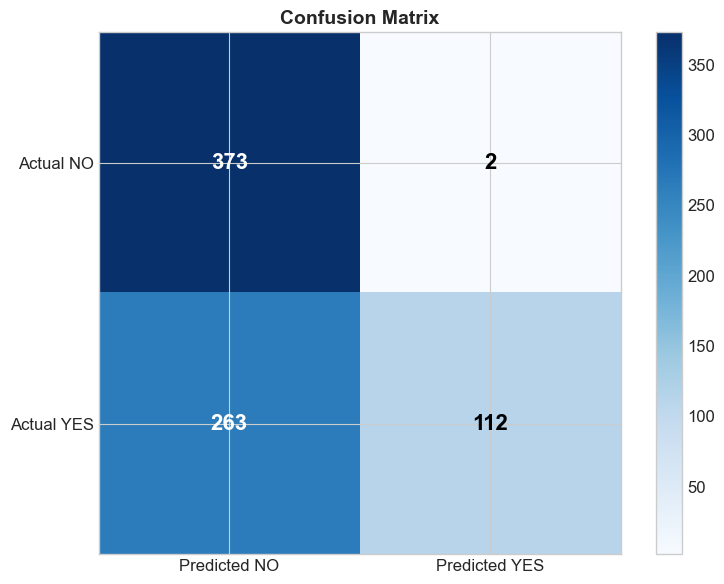

In [8]:
# Visualize confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))

conf_matrix = np.array([[true_neg, false_pos], [false_neg, true_pos]])

im = ax.imshow(conf_matrix, cmap='Blues')

# Add labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted NO', 'Predicted YES'])
ax.set_yticklabels(['Actual NO', 'Actual YES'])

# Add values in cells
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, conf_matrix[i, j], ha='center', va='center', 
                       color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black',
                       fontsize=16, fontweight='bold')

ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## Error Analysis by Task Type

In [9]:
# Analyze errors by task type
df['correct'] = df['correct'].astype(bool)

error_analysis = df.groupby('task_type').agg({
    'correct': ['sum', 'count', 'mean']
}).round(3)

error_analysis.columns = ['Correct', 'Total', 'Accuracy']
error_analysis['Errors'] = error_analysis['Total'] - error_analysis['Correct']
error_analysis = error_analysis.sort_values('Accuracy', ascending=True)

print("Error Analysis by Task Type:")
print(error_analysis)

Error Analysis by Task Type:
                         Correct  Total  Accuracy  Errors
task_type                                                
2d_triangle_equilateral       24     50      0.48      26
2d_triangle_right             24     50      0.48      26
1d_arrow                      50    100      0.50      50
1d_muller                     75    150      0.50      75
2d_rectangle                  54    100      0.54      46
1d_line                       65    100      0.65      35
2d_square                     93    100      0.93       7
2d_circle                    100    100      1.00       0


In [10]:
# Show sample errors
errors_df = df[df['correct'] == False].copy()

print(f"\nTotal Errors: {len(errors_df)}")
print("\nSample Errors:")
print(errors_df[['task_type', 'subtask', 'ground_truth', 'predicted', 'model_response']].head(10).to_string())


Total Errors: 265

Sample Errors:
                  task_type               subtask  ground_truth  predicted model_response
2              2d_rectangle          rectangle_50          True      False             NO
4              2d_rectangle          rectangle_50          True      False             NO
8                   1d_line               Line_50          True      False             NO
11        2d_triangle_right              right_50          True      False             NO
15  2d_triangle_equilateral        equilateral_50          True      False             NO
16             2d_rectangle          rectangle_50          True      False             NO
22  2d_triangle_equilateral        equilateral_50          True      False             NO
30                  1d_line       Rotated_line_50          True      False             NO
32             2d_rectangle  rotated_rectangle_50          True      False             NO
33                1d_muller          muller_clean          True  

## Summary Statistics

In [11]:
# Summary table
summary = {
    'Metric': ['Overall Accuracy', 'Total Samples', 'Correct', 'Incorrect', 'Errors/Null'],
    'Value': [
        f"{metrics['overall']['accuracy']:.2%}",
        metrics['overall']['total'],
        metrics['overall']['correct'],
        metrics['overall']['total'] - metrics['overall']['correct'],
        metrics['overall'].get('errors', 0)
    ]
}

summary_df = pd.DataFrame(summary)
print("=" * 40)
print("BENCHMARK SUMMARY")
print("=" * 40)
print(summary_df.to_string(index=False))
print("=" * 40)

BENCHMARK SUMMARY
          Metric  Value
Overall Accuracy 64.67%
   Total Samples    750
         Correct    485
       Incorrect    265
     Errors/Null      0


## Compare Multiple Results (Optional)

Use this section to compare baseline vs grounded results if both are available.

In [ ]:
# Load multiple result files for comparison
import os

result_files = {
    'GPT-5.1 Baseline': 'benchmark_results_openai-gpt5_42.json',
    # 'GPT-5.1 Grounded': 'benchmark_grounded_42.json',  # Uncomment when available
}

comparison_data = {}

for name, filepath in result_files.items():
    if os.path.exists(filepath):
        with open(filepath, 'r') as f:
            data = json.load(f)
        comparison_data[name] = data['metrics']
        print(f"Loaded: {name} - Accuracy: {data['metrics']['overall']['accuracy']:.2%}")
    else:
        print(f"File not found: {filepath}")

In [ ]:
# Compare if multiple results available
if len(comparison_data) > 1:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    model_names = list(comparison_data.keys())
    overall_accs = [comparison_data[m]['overall']['accuracy'] * 100 for m in model_names]
    
    x = np.arange(len(model_names))
    bars = ax.bar(x, overall_accs, color=['steelblue', 'forestgreen'][:len(model_names)], 
                  edgecolor='black', linewidth=1.2)
    
    for bar, acc in zip(bars, overall_accs):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Random Baseline')
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.set_title('Model Comparison', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.set_ylim(0, 110)
    ax.legend()
    
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("Only one result file loaded. Add more files to comparison_data for comparison.")